In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

%matplotlib inline

In [2]:
# search for csv location

found = []

def find(name):
    path = os.getcwd()
    file = name

    for root, dir, files in os.walk(path):
        for item in files:
            if file == item:
                return os.path.join(root, file)
        return None

found.append(find('data_00.csv.gz'))
found.append(find('data_00.csv'))

In [3]:
# load file

for path in found:
    if path is not None:
        if 'gz' in path:
            fileName = path
            df = pd.read_csv(fileName, index_col='datetime', compression='gzip')
            break
        else: 
            fileName = path
            df = pd.read_csv(fileName, index_col='datetime')
            break

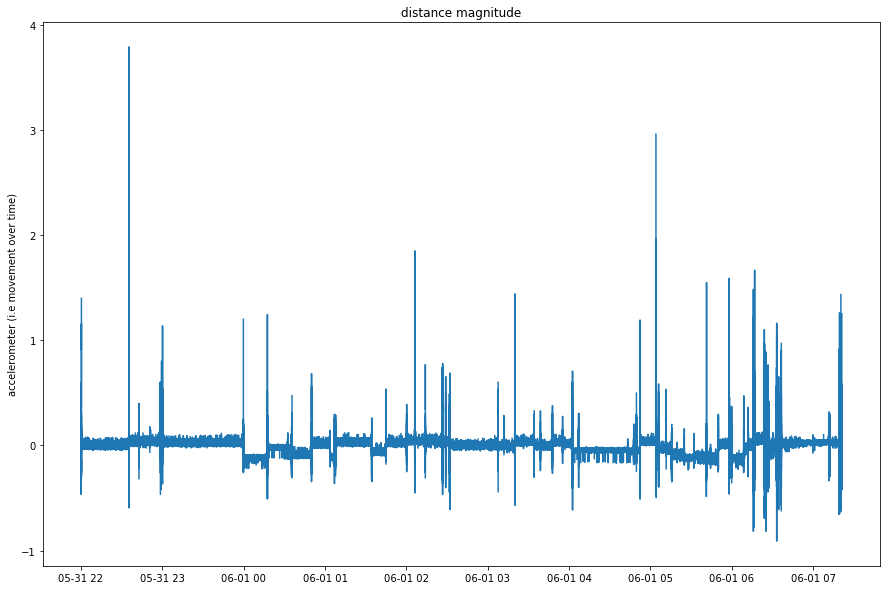

In [4]:
# plot magnitude against time

magnitude = df['wearable-mag-xl1']
datetime = pd.to_datetime(df.index)

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
ax.set_ylabel('accelerometer (i.e movement over time)')
ax.set_title('distance magnitude')
ax.plot(datetime, magnitude)

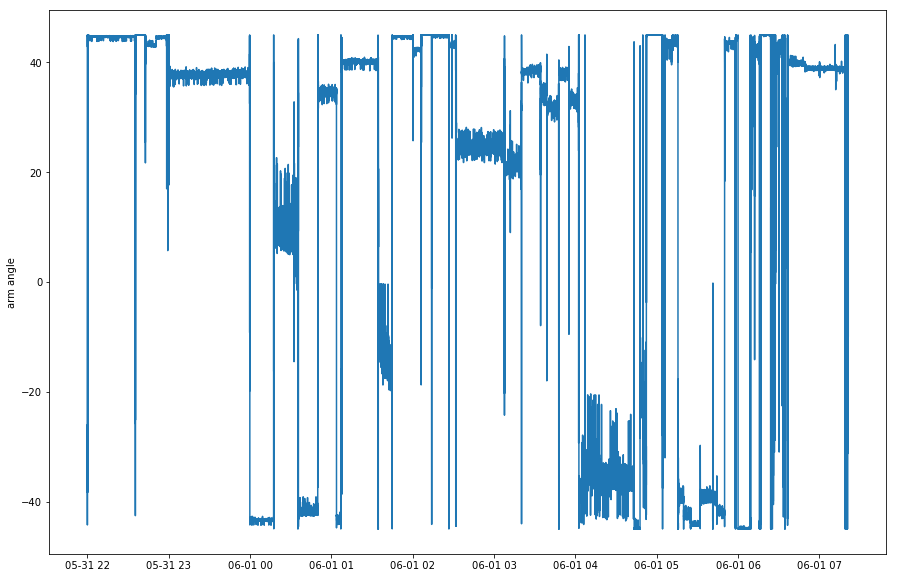

In [5]:
# classifying sleep arm angle

accelerometer_directions = df[['wearable-xl1-x', 'wearable-xl1-y', 'wearable-xl1-z']]

# get rid of rows with missing values
accelerometer_directions = accelerometer_directions.dropna()
datetime = pd.to_datetime(accelerometer_directions.index)

# arm angle calculation using accelerometer data
accelerometer_directions['angle'] = 180/np.pi * np.arctan(accelerometer_directions['wearable-xl1-z'] / np.sqrt( np.square(accelerometer_directions['wearable-xl1-x']) + np.square(accelerometer_directions['wearable-xl1-z']) ))

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
ax.set_ylabel('arm angle')
ax.plot(datetime, accelerometer_directions['angle'])

model for arm angle:  $$ \theta_{\text{arm}} = tan^{-1} \bigg(\frac{ a_{z} }{ \sqrt{a_{x}^{2} + a_{y}^{2}} } \bigg) $$

In [6]:
# calculate the average for every x min for the "arm angle"

resample_interval = '5Min'

# convert index to DatetimeIndex
accelerometer_directions.index = pd.DatetimeIndex(accelerometer_directions.index)

# average values within 5 min intervals

print(accelerometer_directions)
resample_5min_accel = accelerometer_directions.resample(resample_interval)#.min()


# fig = plt.figure(figsize=(15,10))
# ax = fig.add_subplot(111)
# ax.set_title('Arm angle with 5 min resampling')
# ax.set_ylabel('arm angle')
# ax.plot(resample_5min_accel.index, resample_5min_accel['angle'])

                            wearable-xl1-x  wearable-xl1-y  wearable-xl1-z  \
datetime                                                                     
2016-05-31 21:59:59.919856          -0.648           0.238          -0.652   
2016-05-31 21:59:59.969904          -0.574           0.472          -0.500   
2016-05-31 22:00:00.019952          -0.690           0.338          -0.492   
2016-05-31 22:00:00.070000          -0.658           0.396          -0.504   
2016-05-31 22:00:00.119856          -0.656           0.328          -0.442   
2016-05-31 22:00:00.169904          -0.672           0.608          -0.386   
2016-05-31 22:00:00.219952          -0.648           0.318          -0.480   
2016-05-31 22:00:00.270000          -0.752           0.214          -0.762   
2016-05-31 22:00:00.319856          -0.680           0.358          -0.640   
2016-05-31 22:00:00.369904          -0.746           0.582          -0.962   
2016-05-31 22:00:00.419952          -0.832           0.316      

In [12]:
resample_5min_accel.max()


,wearable-xl1-x,wearable-xl1-y,wearable-xl1-z,angle
datetime,,,,
2016-05-31 21:55:00,-0.574,0.472,-0.500,-33.298067
2016-05-31 22:00:00,1.048,1.634,1.560,44.999732
2016-05-31 22:05:00,0.192,0.824,0.766,44.859176
2016-05-31 22:10:00,0.178,0.830,0.748,44.875142
2016-05-31 22:15:00,0.192,0.830,0.754,44.881437
2016-05-31 22:20:00,0.184,0.834,0.758,44.848123
2016-05-31 22:25:00,0.192,0.830,0.752,44.849010
2016-05-31 22:30:00,0.184,0.834,0.748,44.881437
2016-05-31 22:35:00,1.232,1.446,4.094,44.999939


/Users/Andrew/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:9: FutureWarning: 
.resample() is now a deferred operation
You called index(...) on this deferred object which materialized it into a dataframe
by implicitly taking the mean.  Use .resample(...).mean() instead
/Users/Andrew/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:10: FutureWarning: 
.resample() is now a deferred operation
You called index(...) on this deferred object which materialized it into a dataframe
by implicitly taking the mean.  Use .resample(...).mean() instead
/Users/Andrew/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:11: FutureWarning: 
.resample() is now a deferred operation
You called index(...) on this deferred object which materialized it into a dataframe
by implicitly taking the mean.  Use .resample(...).mean() instead


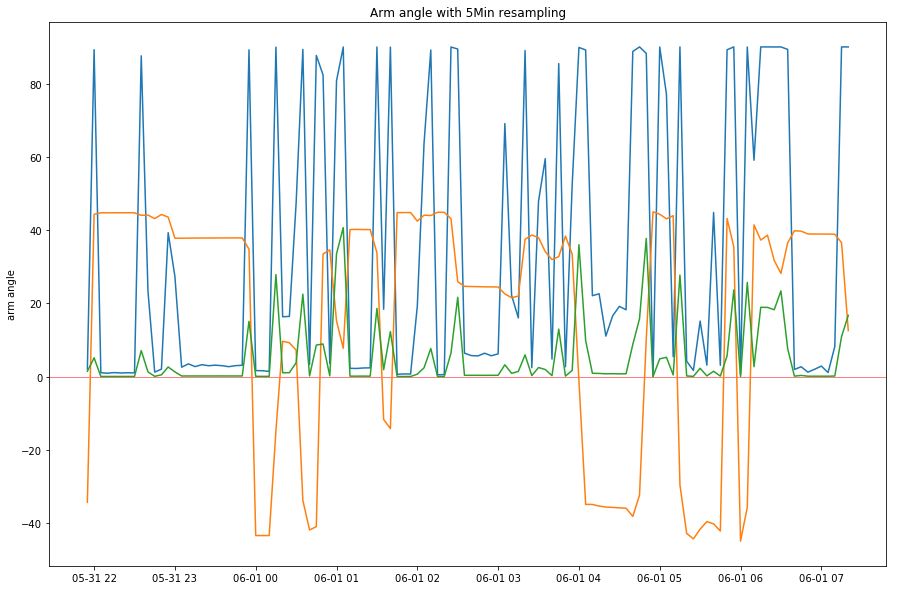

In [8]:
a = resample_5min_accel['angle'].max()-resample_5min_accel['angle'].min()
b = accelerometer_directions.resample(resample_interval).mean()
c = accelerometer_directions.resample(resample_interval).std()

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
ax.set_title('Arm angle with {} resampling'.format(resample_interval))
ax.set_ylabel('arm angle')
ax.plot(resample_5min_accel.index, a)
ax.plot(resample_5min_accel.index, b['angle'])
ax.plot(resample_5min_accel.index, c['angle'])
ax.axhline(y=0.002,xmin=0,xmax=3,c="red",linewidth=0.5,zorder=0)

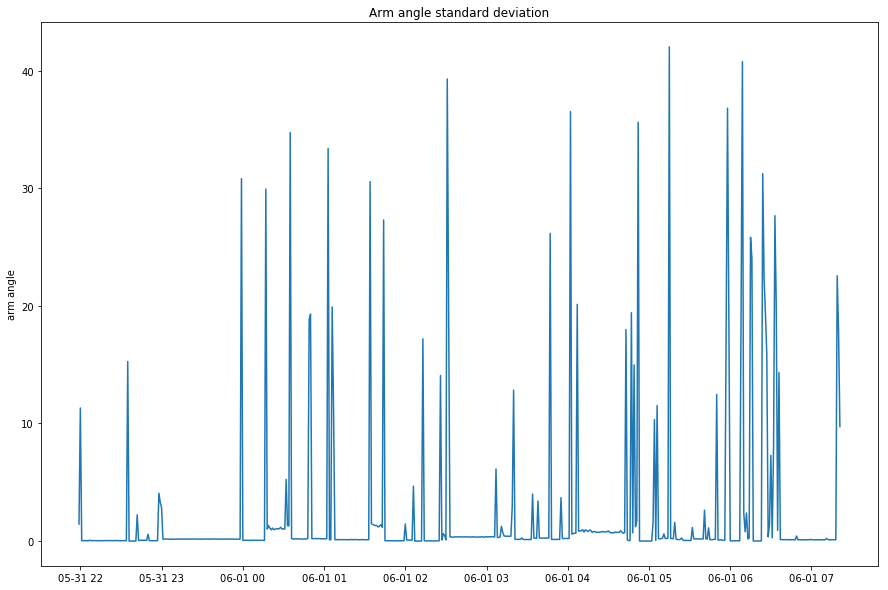

In [9]:
resample_interval = '1Min'

deviation = accelerometer_directions.resample(resample_interval).std()

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
ax.set_title('Arm angle standard deviation')
ax.set_ylabel('arm angle')
ax.plot(deviation.index, deviation['angle'])

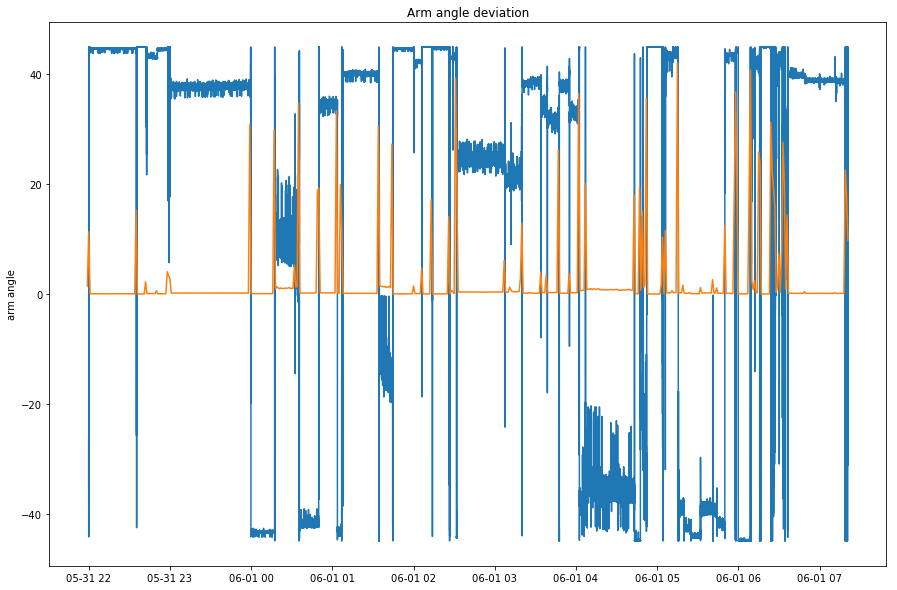

In [10]:

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
ax.set_title('Arm angle deviation')
ax.set_ylabel('arm angle')
ax.plot(datetime, accelerometer_directions['angle'])
ax.plot(deviation.index, deviation['angle'])


In [11]:
from math import floor

resample_interval = '5Min'
std = accelerometer_directions.resample(resample_interval).std()['angle']
std_threshold = 5
total_sleep_interval = std.count()
sleep_over_std = std_5min[std<std_threshold].count()


print("percentage of sleep {}% under {} std".format(floor(sleep_over_std/total_sleep_interval * 100), std_threshold))

NameError: name 'std_5min' is not defined

In [ ]:
a = accelerometer_directions.resample('5Min').std()['angle']
print(a.mean())

### Approach 1

using the model to calulate arm angle : $$ \theta_{\text{arm}} = tan^{-1} \bigg(\frac{ a_{z} }{ \sqrt{a_{x}^{2} + a_{y}^{2}} } \bigg) $$

The amount of angle change therefore corresponds displacement over time.

* 



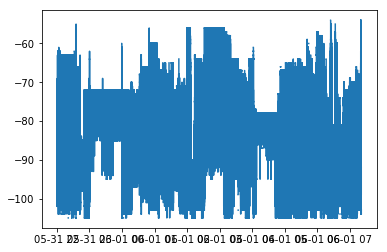

In [19]:
df['wearable-rss']


plt.plot(pd.to_datetime(df.index), df['wearable-rss'])

In [20]:
df['wearable-rss'].mean()

-83.61496953820911

In [24]:
df['temperature'].dropna()

datetime
2016-05-31 22:00:01.616000+00:00    22.90
2016-05-31 22:00:01.798000+00:00    21.29
2016-05-31 22:00:02.113000+00:00    21.29
2016-05-31 22:00:03.133000+00:00    20.97
2016-05-31 22:00:04.052000+00:00    22.90
2016-05-31 22:00:05.922000+00:00    22.26
2016-05-31 22:00:07.569000+00:00    22.26
2016-05-31 22:00:08.203000+00:00    23.55
2016-05-31 22:00:09.179000+00:00    22.90
2016-05-31 22:00:11.617000+00:00    22.58
2016-05-31 22:00:11.798000+00:00    21.29
2016-05-31 22:00:12.111000+00:00    21.61
2016-05-31 22:00:13.134000+00:00    20.97
2016-05-31 22:00:14.112000+00:00    22.90
2016-05-31 22:00:15.575000+00:00    22.26
2016-05-31 22:00:17.566000+00:00    22.26
2016-05-31 22:00:18.205000+00:00    23.55
2016-05-31 22:00:19.153000+00:00    22.90
2016-05-31 22:00:21.251000+00:00    22.90
2016-05-31 22:00:21.800000+00:00    21.29
2016-05-31 22:00:22.106000+00:00    21.29
2016-05-31 22:00:22.323000+00:00    20.97
2016-05-31 22:00:24.113000+00:00    22.90
2016-05-31 22:00:25.92900

### using this resampled data what can I do to detect sleep


* over 5 min 5angle
* work out the angle deviation
* frequency
* and max moved